In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('computer_sales.csv')
print(df.head(5))

   InvoiceID        Date  CustomerID CustomerRegion ProductCategory   Brand  \
0          1  2023-01-01         272           East         Desktop  Lenovo   
1          2  2023-01-02         147           East         Desktop   Apple   
2          3  2023-01-03         217          South         Desktop      HP   
3          4  2023-01-04         292          South         Desktop      HP   
4          5  2023-01-05         423           West         Desktop    Acer   

   UnitPrice  Quantity  
0       1965         1  
1        815         4  
2        823         4  
3       1711         4  
4       1434         4  


In [5]:
print(df.info)

<bound method DataFrame.info of      InvoiceID        Date  CustomerID CustomerRegion ProductCategory   Brand  \
0            1  2023-01-01         272           East         Desktop  Lenovo   
1            2  2023-01-02         147           East         Desktop   Apple   
2            3  2023-01-03         217          South         Desktop      HP   
3            4  2023-01-04         292          South         Desktop      HP   
4            5  2023-01-05         423           West         Desktop    Acer   
..         ...         ...         ...            ...             ...     ...   
995        996  2025-09-22         325          North       Accessory  Lenovo   
996        997  2025-09-23         194          North          Laptop   Apple   
997        998  2025-09-24         338          North       Accessory    Dell   
998        999  2025-09-25         265           West       Accessory  Lenovo   
999       1000  2025-09-26         482          North       Accessory   Apple

print(df.describe())

In [9]:
print(df.isnull().sum())

InvoiceID          0
Date               0
CustomerID         0
CustomerRegion     0
ProductCategory    0
Brand              0
UnitPrice          0
Quantity           0
dtype: int64


## 4.sales analysis

## product wise sales

In [14]:
df['Sales']=df['UnitPrice']*df['Quantity']
print(df.head(3))

   InvoiceID        Date  CustomerID CustomerRegion ProductCategory   Brand  \
0          1  2023-01-01         272           East         Desktop  Lenovo   
1          2  2023-01-02         147           East         Desktop   Apple   
2          3  2023-01-03         217          South         Desktop      HP   

   UnitPrice  Quantity  Sales  
0       1965         1   1965  
1        815         4   3260  
2        823         4   3292  


In [18]:
pivot1=pd.pivot_table(
    df,
    index='ProductCategory',
    values='Sales',
    aggfunc=sum
)
print(pivot1)

                   Sales
ProductCategory         
Accessory         955066
Desktop          1028865
Laptop            971531


C:\Users\Ncc\AppData\Local\Temp\ipykernel_15152\3308604996.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot1=pd.pivot_table(


                   Sales
ProductCategory         
Accessory         955066
Desktop          1028865
Laptop            971531


<Axes: xlabel='ProductCategory'>

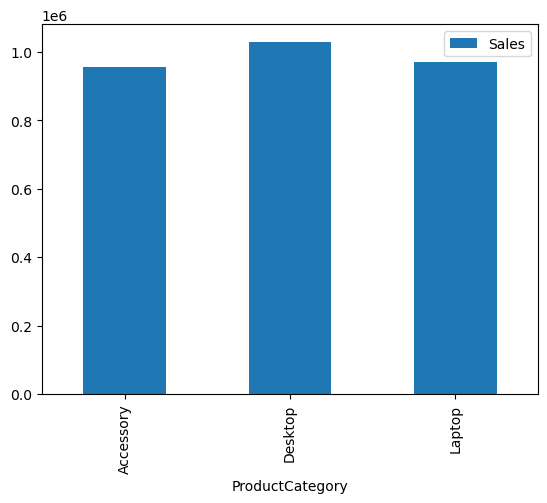

In [22]:
pivot1=pd.pivot_table(
    df,
    index='ProductCategory',
    values='Sales',
    aggfunc='sum'
)
print(pivot1)
pivot1.plot(kind='bar')

## product wise sales

                   Sales
ProductCategory         
Accessory         955066
Desktop          1028865
Laptop            971531


<Axes: xlabel='ProductCategory'>

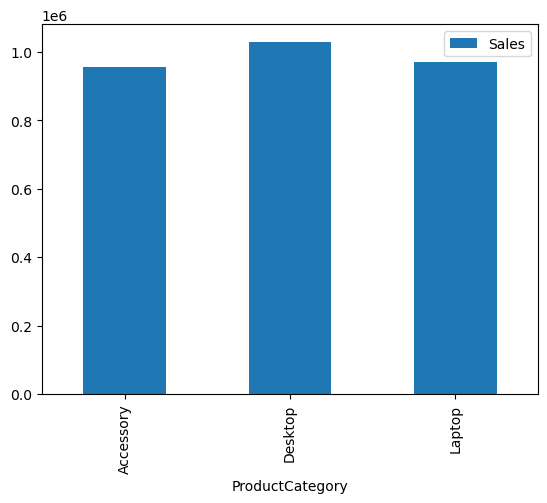

In [22]:
pivot1=pd.pivot_table(
    df,
    index='ProductCategory',
    values='Sales',
    aggfunc='sum'
)
print(pivot1)
pivot1.plot(kind='bar')


## hight sale show

Brand
HP        639068
Apple     609642
Lenovo    586889
Dell      585753
Acer      534110
Name: Sales, dtype: int64


<Axes: ylabel='Sales'>

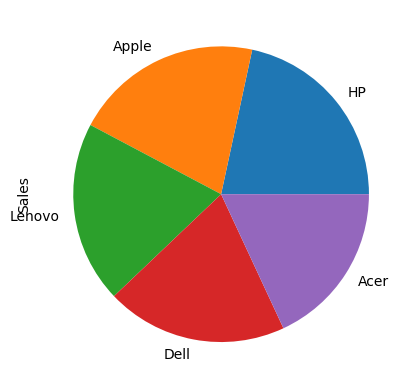

In [34]:
category_sales=df.groupby('Brand')['Sales'].sum().sort_values(ascending=False)
print(category_sales)

category_sales.plot(kind='pie')

In [38]:
corr_mat=df[['UnitPrice','Quantity','Sales']].corr()
print(corr_mat)
             

           UnitPrice  Quantity     Sales
UnitPrice   1.000000 -0.009487  0.641566
Quantity   -0.009487  1.000000  0.699714
Sales       0.641566  0.699714  1.000000


           UnitPrice  Quantity     Sales
UnitPrice   1.000000 -0.009487  0.641566
Quantity   -0.009487  1.000000  0.699714
Sales       0.641566  0.699714  1.000000


<Axes: >

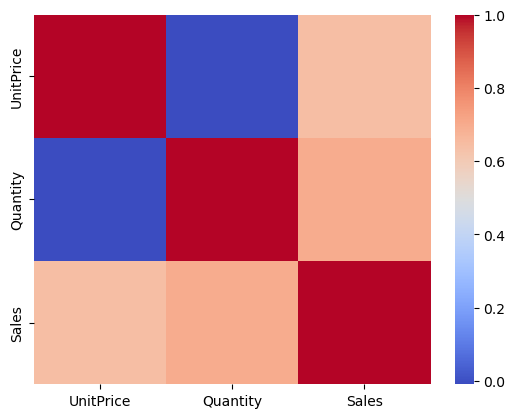

In [40]:
corr_mat=df[['UnitPrice','Quantity','Sales']].corr()
print(corr_mat)
sns.heatmap(corr_mat,cmap='coolwarm')

## top selling customar

In [47]:
customer_summary=df.groupby('CustomerID')['Sales'].sum().sort_values(ascending=False)
print(customer_summary)

CustomerID
496    24354
297    24016
248    24008
307    24000
390    23263
       ...  
152      646
412      646
196      576
201      394
121      326
Name: Sales, Length: 371, dtype: int64
